<a href="https://colab.research.google.com/github/innaraarif26-create/Data-SCIENCE-AND-AI/blob/main/Basic_ModelTraining_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/placement-dataset.csv')
df


,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [ ]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
#steps
#preprocess+ EDA + Feature selection
#extract input and output columns
#scale the values
#train test split(crosss validation)
#train the model
#evaluate the model/model selection
#deploy the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
df = df.iloc[: ,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df = df.dropna()
df


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
3,7.4,132.0,1
4,5.8,142.0,0
5,7.1,48.0,1
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


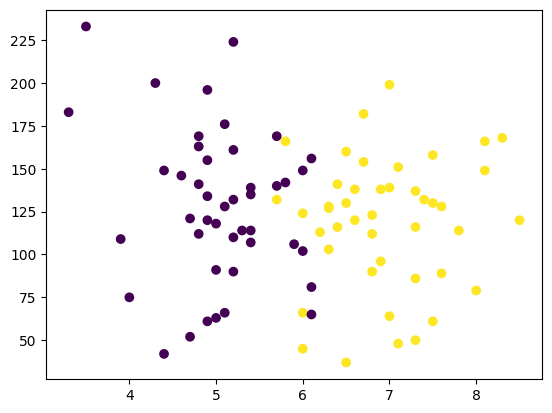

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'] ,df['iq'] ,c = df['placement'])

In [ ]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
3,7.4,132.0
4,5.8,142.0
5,7.1,48.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)
x_train

,cgpa,iq
94,4.7,52.0
5,7.1,48.0
20,6.6,120.0
75,4.8,169.0
57,6.5,130.0
...,...,...
54,6.4,141.0
92,5.2,110.0
86,5.1,128.0
34,4.8,163.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train

,cgpa,iq
94,4.7,52.0
5,7.1,48.0
20,6.6,120.0
75,4.8,169.0
57,6.5,130.0
...,...,...
54,6.4,141.0
92,5.2,110.0
86,5.1,128.0
34,4.8,163.0


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
ypred=clf.predict(x_test_scaled)
ypred

array([1, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
y_test


,placement
69,1
88,0
33,0
49,0
56,0
78,0
81,0
87,1
31,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.5555555555555556

In [ ]:
# to deploy

import pickle
pickle.dump(clf,open('model.pkl','wb'))